## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib as nlp
df=pd.read_csv('df_full.csv',encoding='utf-8' 
                   )
df

,score,sentiment,Text
0,1,Positive,ZUKA ZAMA! 🇺🇸🇺🇸🇺🇸❤️🤍💙
1,1,Positive,Zip ties!
2,1,Positive,Zero sugar options would be nice as well
3,1,Positive,Zendaya by cozz ft. J Cole 🐐
4,1,Positive,Zayunmmmm who are these people 🥵😍
...,...,...,...
29400,1,Positive,- jigsaw puzzles 1000 piece preferred \n- maki...
29401,1,Positive,- Having the Squad that I do. They are my MOD ...
29402,1,Positive,- 😝💗Nintendo switch🥺pls\n🚫Please no chocolate ...
29403,1,Positive,Thanks !


In [2]:
df['score'].unique()

array([1, 0])

In [3]:
#converting pandas object to a string type
df['Text'] = df['Text'].astype('str')
df['score'] = df['score'].astype('category')

## Check the number of positive vs. negative tagged sentences

In [4]:
positives = df['score'][df.score == 1 ]
negatives = df['score'][df.score == 0 ]

print('Total length of the data is:         {}'.format(df.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         29405
No. of positve tagged sentences is:  27794
No. of negative tagged sentences is: 1611


In [5]:
from nltk.corpus import stopwords 

custom=["hasn't","won't",'having', 'but', 'couldn',
                       'wasn','shouldn',"hadn't", "doesn't", 'hasn','mightn',
                       "couldn't", 'aren',"aren't",'didn',"mustn't", 'nor',"haven't", "isn't",  'isn',
                       "don't", "wasn't", "shouldn't", 'doesn',"didn't",
                       'not',"weren't", "wouldn't", 'don', 'haven']

new_list= [x for x in stopwords.words('english') if x not in custom]
print(new_list) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 

In [6]:
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) 
#that a search engine has been programmed to ignore,
#both when indexing entries for searching and when retrieving them as the result of a search query.
nltk.download('stopwords')
stopword = set(new_list)
print(stopword)

{"you'd", 'who', 'where', 'yourselves', 'or', 'been', 'there', 'o', 'herself', 'here', 'm', 'under', 'how', 'by', 'during', 'd', 'weren', 'up', 'were', "needn't", 'from', 'after', 'again', 'hers', 'below', 'some', "that'll", 'shan', 'when', 'about', 'my', 'your', 'is', 'we', 'these', 'our', 'you', 'was', 'into', 'until', 'their', 're', 't', 'itself', 'she', 'themselves', 'those', "mightn't", "shan't", 'did', 'to', 'her', 'once', 'had', 'own', 'through', "you'll", 've', 'all', 'he', 'its', "it's", 'won', 'it', 'do', 'most', 'more', 'very', 's', 'am', 'each', 'too', 'll', 'such', 'has', 'if', 'for', 'what', 'a', 'of', 'further', 'should', 'him', 'against', 'they', 'any', 'y', 'yourself', 'no', 'as', 'be', 'will', 'and', 'out', 'just', 'so', 'while', 'ourselves', 'wouldn', 'can', 'himself', 'yours', 'mustn', 'this', 'in', 'an', 'are', "should've", 'does', 'whom', 'ours', 'then', 'that', 'few', "you're", 'doing', 'over', 'other', 'them', 'because', 'ain', 'me', 'same', 'needn', 'both', 'ha

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/iremindergand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Cleaning

In [12]:
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_text(Text):
    Text=Text.lower()
    # Removing all URls 
    Text = re.sub(urlPattern,'',Text)
    # Removing all @username.
    Text = re.sub(userPattern,'', Text) 
    #Remove punctuations
    Text = Text.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(Text)
    #tokens = [w for w in tokens if len(w)>2]
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [13]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
}

In [14]:
def convert_abbrev_in_text(Text):
    t=[]
    words=Text.split()
    t = [abbreviations[w] if w in abbreviations.keys() else w for w in words]
    return ' '.join(t)  

In [15]:
from cleantext import clean
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

## Text Processing Completed

In [16]:
df['Text'] = df['Text'].apply(lambda x: convert_abbrev_in_text(x))

df['Text'] = df['Text'].apply(lambda x: process_text(x))
df['Text'] = df['Text'].apply(lambda x: remove_emoji(x))

print('Text Preprocessing complete.')
df

Text Preprocessing complete.


,score,sentiment,Text
0,1,Positive,zuka zama
1,1,Positive,zip tie
2,1,Positive,zero sugar option would nice well
3,1,Positive,zendaya cozz foot cole
4,1,Positive,zayunmmmm people
...,...,...,...
29400,1,Positive,jigsaw puzzle 1000 piece preferred making move...
29401,1,Positive,having squad mod family enjoyed seeing people ...
29402,1,Positive,nintendo switchpls please chocolate candy fuzz...
29403,1,Positive,thanks


In [17]:
from sklearn.utils import shuffle
df = shuffle(df).reset_index(drop=True)


## Tokenization

In [18]:
tokenized_df=df['Text'].apply(lambda x: x.split())
tokenized_df.head(5)

0                [go, killin, oven]
1                         [bad, 16]
2               [great, job, squad]
3                        [love, gm]
4    [love, congrats, mya, katelyn]
Name: Text, dtype: object

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words=new_list,ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['Text'].values.astype('U'))

In [20]:
df.head()

,score,sentiment,Text
0,1,Positive,go killin oven
1,0,Negative,bad 16
2,1,Positive,great job squad
3,1,Positive,love gm
4,1,Positive,love congrats mya katelyn


In [21]:
y=df['score'].astype('category')

## Train/Test Split

In [22]:
from sklearn.model_selection import train_test_split
X=text_counts
y=df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19, stratify=y)


In [23]:
y_test.value_counts()

1    5559
0     322
Name: score, dtype: int64

## Naive Bayes

In [24]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
cnb = ComplementNB()
cnb.fit(X_train, y_train)
cross_cnb = cross_val_score(cnb, X, y,n_jobs = -1)
print("Cross Validation score = ",cross_cnb)                
print ("Train accuracy ={:.2f}%".format(cnb.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(cnb.score(X_test,y_test)*100))
train_acc_cnb=cnb.score(X_train,y_train)
test_acc_cnb=cnb.score(X_test,y_test)

Cross Validation score =  [0.83931304 0.84067335 0.83897296 0.84679476 0.83540214]
Train accuracy =88.44%
Test accuracy =83.37%


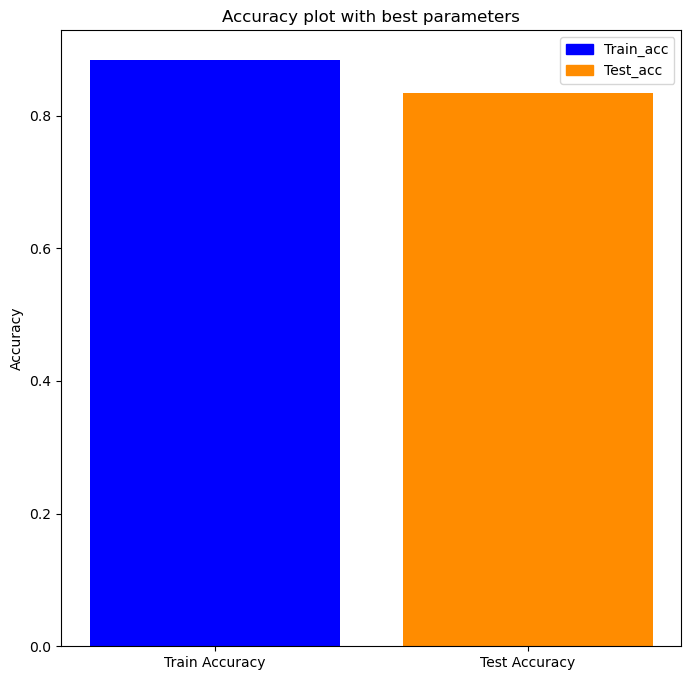

In [25]:
#plotting the best parameters
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_cnb = [train_acc_cnb,test_acc_cnb]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_cnb)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_cnb)), data_cnb,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()

## Confusion Matrix

In [26]:
 from sklearn.metrics import *
#Predict test data set
y_pred_cnb =cnb.predict(X_test)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_cnb))

[[ 180  142]
 [ 836 4723]]


In [27]:
y_pred = cnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
df_cm

,0,1
0,180,142
1,836,4723


In [34]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

In [35]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_cnb))



              precision    recall  f1-score   support

           0       0.18      0.56      0.27       322
           1       0.97      0.85      0.91      5559

    accuracy                           0.83      5881
   macro avg       0.57      0.70      0.59      5881
weighted avg       0.93      0.83      0.87      5881



## Calculating F1, prescision and recall scores

In [36]:
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_cnb, average="macro")*100))
f1_cnb=f1_score(y_test, y_pred_cnb, average="macro")
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_cnb, average="macro")*100))
precision_cnb=precision_score(y_test, y_pred_cnb, average="macro")
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred_cnb, average="macro")*100))  
recall_cnb=recall_score(y_test, y_pred_cnb, average="macro")

F1 score =58.76%
Precision score =57.40%
Recall score =70.43%


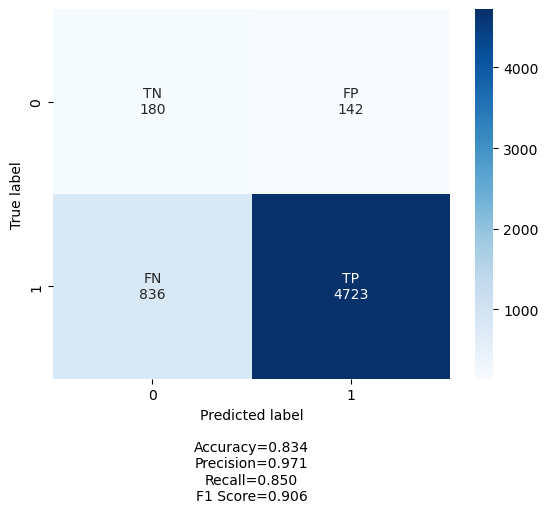

In [37]:
labels = ['TN','FP','FN','TP']
categories = ["0", "1"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

## Advanced Confusion Matrix

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks


    box_labels = [f"{v1}{v2}".strip() for v1, v2 in zip(group_labels,group_counts)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap='Blues',cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)




In [39]:
print(classification_report(y_test, y_pred_cnb))


              precision    recall  f1-score   support

           0       0.18      0.56      0.27       322
           1       0.97      0.85      0.91      5559

    accuracy                           0.83      5881
   macro avg       0.57      0.70      0.59      5881
weighted avg       0.93      0.83      0.87      5881



In [40]:
cm = confusion_matrix(y_test, y_pred_cnb, labels=df.score.unique())
df_cm = pd.DataFrame(cm, index=df.score.unique(), columns=df.score.unique())
df_cm

df_cm_percentage = df_cm.copy()
for i in df_cm_percentage:
  df_cm_percentage[i]/=df_cm_percentage[i].sum()

df_cm_percentage

,1,0
1,0.970812,0.822835
0,0.029188,0.177165
